In [3]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
!pip install tsfel 
import tsfel


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 773.8 kB/s eta 0:00:00MB/s eta 0:00:01


In [5]:
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

dataset_dir = os.path.join(combined_dir,"Train")

X = []
y = []


Q1. Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?Q1. Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?

Sol: The difference between static and dynamic activities is evident due to static activities showing a lesser variation in the acceleration values as compared to the dynamic activities. Yes, the model will be able to classify the activities based on the data, since the segregation boundaries of all the activities are distinct. 

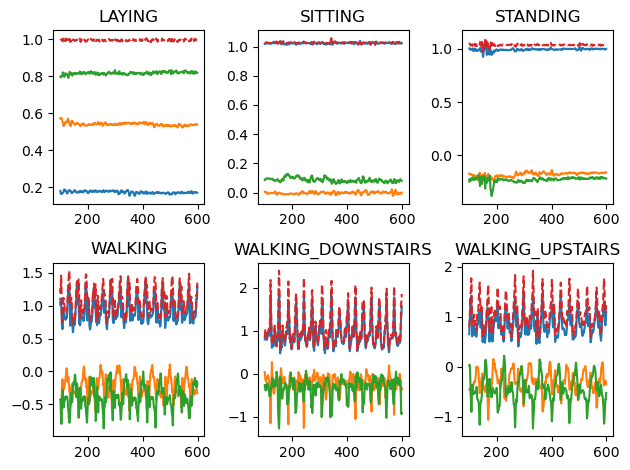

In [7]:
# Q1 waveform plotting.
for i, folder in enumerate(folders):
    files = os.listdir(os.path.join(dataset_dir,folder))
    
    df = pd.read_csv(os.path.join(dataset_dir,folder,files[2]),sep=",",header=0)
    df = df[offset:offset+time*50]
    #signal = df.iloc[:, 0]
    
    #Q1
    plt.subplot(2, 3, i + 1)
    #plt.plot(signal)    
    plt.plot(df)
    plt.title(folder)
    #plt.xlabel('Sample Index')
    #plt.ylabel('Amplitude')
    
    # Q2 - Linear acceleration
    df['magnitude'] = np.sqrt(df['accx']**2 + df['accy']**2 + df['accz']**2)
    #print(df['magnitude'])   
    #plt.subplot(2, 3, i + 1)
    #plt.plot(signal)    
    plt.plot(df['magnitude'], linestyle = '--')
    
plt.tight_layout()    
plt.show()


Q2. Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration for each activity and justify your answer.

Sol: Trends in linear acceleration: laying/sitting/standing: value has very little variation around 1.0. 
			    walking activities: value has high variation, which follows the the trend of accx most of the time.
Yes, a machine learning (ML) model is required to learn the amount of variation with respected to the baseline in the linear acceleration. We want the model to learn the pattern happening in the variation. In case we have a clear demarcation of the variance values for static and dynamic we may not need a ML model for the broader classification of static vs dynamic. But in some cases when the quantitative difference is less then we may need a ML model to infer through the patterns. The linear acceleration follows a common trend in static and dynamic activities, which is not exibited by the indivisual acceleration components. 

Original shape of X (before reshaping): (126, 500)
Shape of X after reshaping: (126, 500)
Shape of X after PCA: (126, 2)


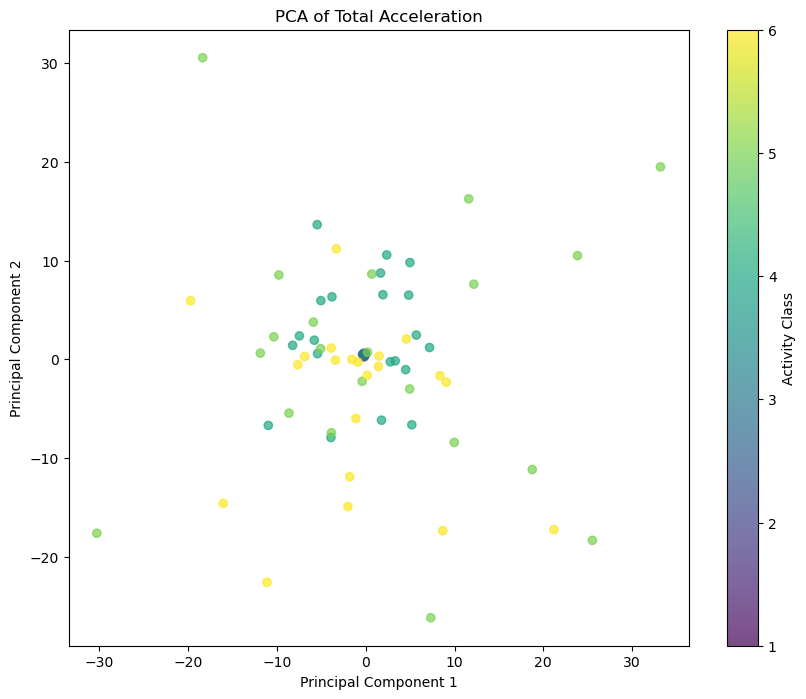

In [9]:
# Q3.1 PCA for all files in dataset for total acceleration.    
for i, folder in enumerate(folders):
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:
	    df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
	    df = df[offset:offset+time*50]
	    df['magnitude'] = np.sqrt(df['accx']**2 + df['accy']**2 + df['accz']**2)
    
		#Q3.1 - PCA
	    X.append(df['magnitude'].values)
	    y.append(folders.index(folder) + 1)
       
X = np.array(X)
y = np.array(y)

print(f"Original shape of X (before reshaping): {X.shape}")				#(126,500)
X = X.reshape(X.shape[0], -1)
print(f"Shape of X after reshaping: {X.shape}")							#(126,500)

# Standardisation
scaler = StandardScaler()
std_X = scaler.fit_transform(X)
#std_y = scaler.fit_transform(y)
   
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(std_X)    
print(f"Shape of X after PCA: {X_pca.shape}")							#(126,2)

#X_pca = pca.transform(std_X)
#components = pca.components_
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('PCA of Total Acceleration')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=range(1, len(folders)+1), label='Activity Class')
plt.show()

/tmp/ipykernel_655291/219850808.py:14: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df[['accx', 'accy', 'accz']], verbose=0)
/tmp/ipykernel_655291/219850808.py:14: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df[['accx', 'accy', 'accz']], verbose=0)
/tmp/ipykernel_655291/219850808.py:14: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df[['accx', 'accy', 'accz']], verbose=0)
/tmp/ipykernel_655291/219850808.py:14: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df[['accx', 'accy', 'accz']], verbose=0)
/tmp/ipykernel_655291/219850808.py:14: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, d

columns =  Index(['accx', 'accy', 'accz'], dtype='object')
Original shape of X_t (before reshaping): (126, 120)
Shape of X_t after reshaping: (126, 120)
Shape of X after PCA: (126, 2)


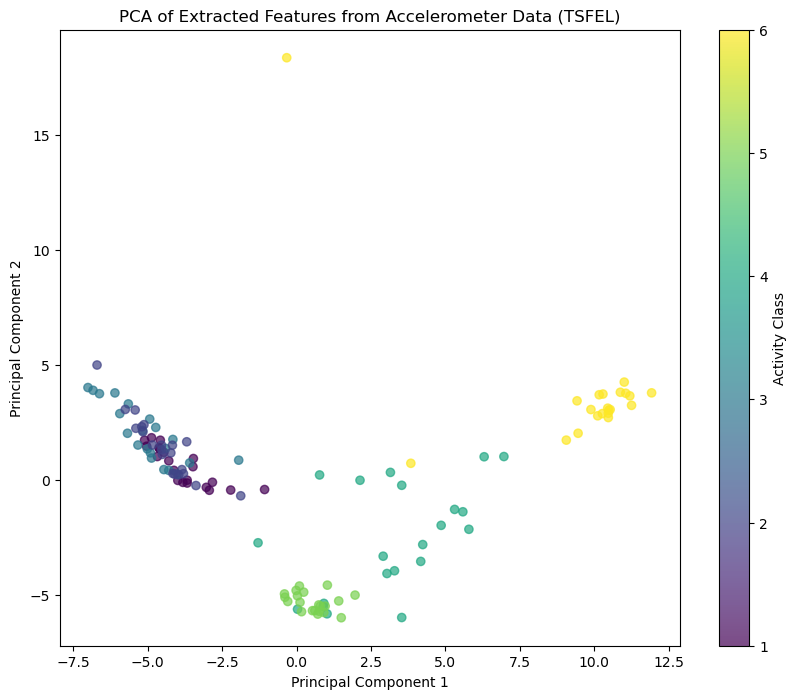

In [28]:
# Q3.2 TSFEL features created.
cfg = tsfel.get_features_by_domain("statistical")

X_t = []
y_t = []
f = []
for i, folder in enumerate(folders):
    files = os.listdir(os.path.join(dataset_dir, folder))
    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
        df = df[offset:offset + time * 50]

        # Extract features from the accelerometer data
        features = tsfel.time_series_features_extractor(cfg, df[['accx', 'accy', 'accz']], verbose=0)

        X_t.append(features.values.flatten())
        y_t.append(classes[folder])
        f.append(features)


X_t = np.array(X_t)
y_t = np.array(y_t)
print("columns = ", df.columns)
print(f"Original shape of X_t (before reshaping): {X_t.shape}")				# None (126, 1152) # statistical (126, 120)
X_t = X_t.reshape(X_t.shape[0], -1)
print(f"Shape of X_t after reshaping: {X_t.shape}")							# None (126, 1152) # statistical (126, 120)

# Standardisation
scaler = StandardScaler()
std_X_t = scaler.fit_transform(X_t)
#std_y = scaler.fit_transform(y)
   
pca = PCA(n_components = 2)
X_pca_t = pca.fit_transform(std_X_t)    
print(f"Shape of X after PCA: {X_pca_t.shape}")							# None (126, 2) # statistical (126, 2)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_t[:, 0], X_pca_t[:, 1], c=y_t, cmap='viridis', alpha=0.7)
plt.title('PCA of Extracted Features from Accelerometer Data (TSFEL)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=range(1, len(folders) + 1), label='Activity Class')
plt.show()

TSFEL features columns: Index(['accx_Absolute energy', 'accx_Average power',
       'accx_ECDF Percentile Count_0', 'accx_ECDF Percentile Count_1',
       'accx_ECDF Percentile_0', 'accx_ECDF Percentile_1', 'accx_ECDF_0',
       'accx_ECDF_1', 'accx_ECDF_2', 'accx_ECDF_3',
       ...
       'accz_Mean', 'accz_Mean absolute deviation', 'accz_Median',
       'accz_Median absolute deviation', 'accz_Min',
       'accz_Peak to peak distance', 'accz_Root mean square', 'accz_Skewness',
       'accz_Standard deviation', 'accz_Variance'],
      dtype='object', length=120)


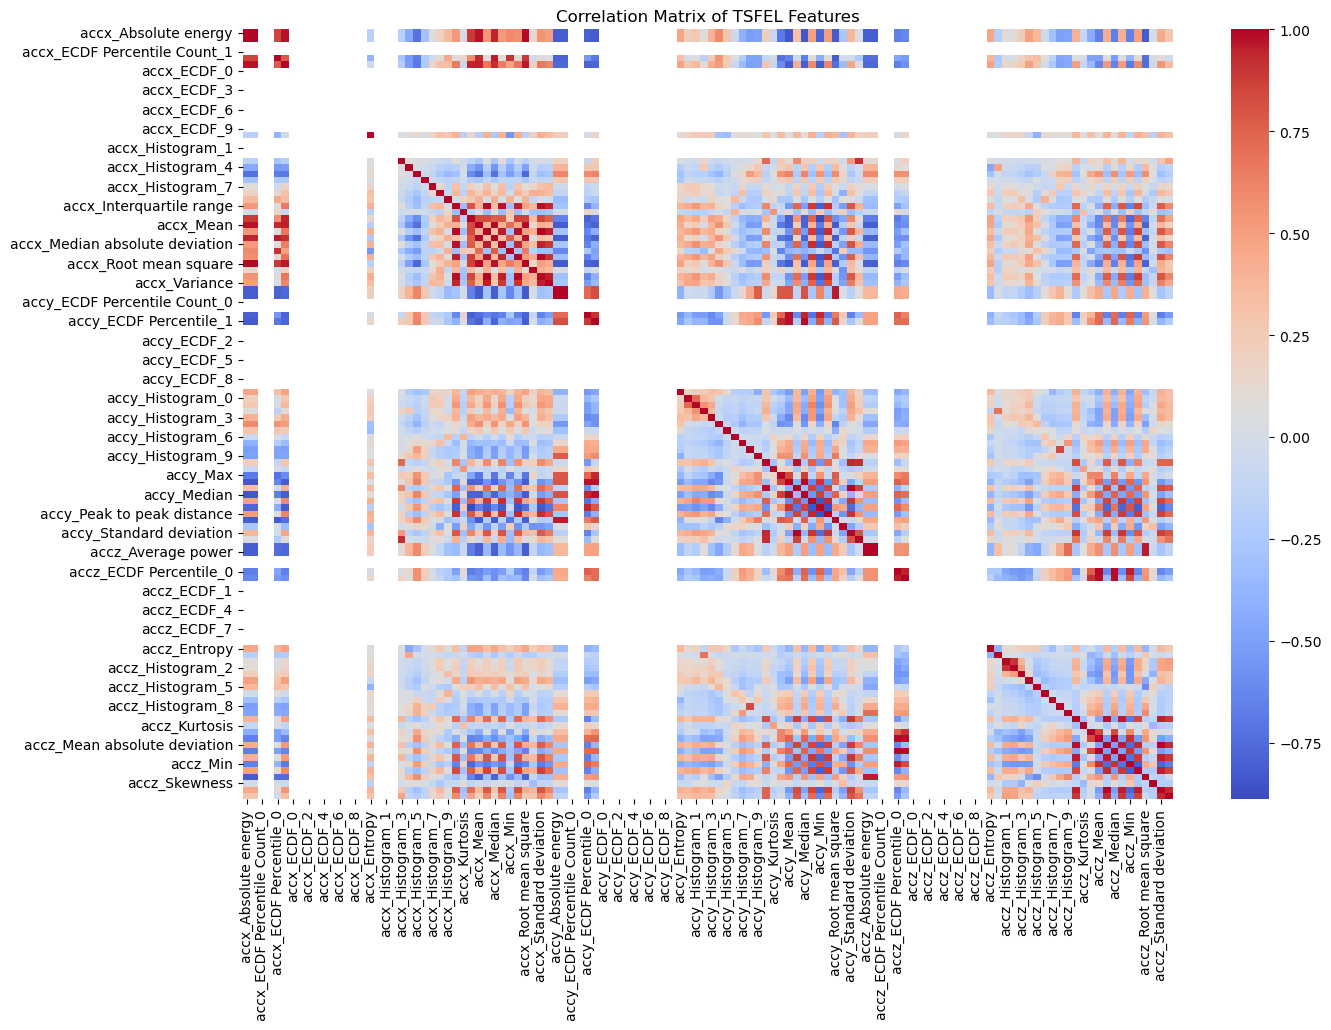

Highly correlated features (TSFEL): {'accz_Min', 'accx_Median', 'accx_Mean', 'accz_Peak to peak distance', 'accx_Average power', 'accz_Mean', 'accz_Root mean square', 'accz_Variance', 'accx_Mean absolute deviation', 'accz_Histogram_2', 'accz_Mean absolute deviation', 'accx_Max', 'accx_Min', 'accy_Max', 'accz_Standard deviation', 'accy_Mean absolute deviation', 'accx_Median absolute deviation', 'accz_Median absolute deviation', 'accx_Root mean square', 'accy_Peak to peak distance', 'accy_Standard deviation', 'accy_Root mean square', 'accy_Variance', 'accz_Average power', 'accy_Min', 'accy_Median absolute deviation', 'accx_ECDF Percentile_1', 'accx_Variance', 'accx_Standard deviation', 'accz_Median', 'accz_ECDF Percentile_1', 'accx_Peak to peak distance', 'accy_Median', 'accy_Average power', 'accz_Max', 'accy_Mean'}


In [13]:
# Q4 Correlation matrix calc.
f = pd.concat(f, axis=0)
print("TSFEL features columns:", f.columns) 
correlation_matrix_tsfel = f.corr()       

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_tsfel, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix of TSFEL Features')
plt.show()

# Q4 Identifying highly correlated features in corr. matrix.
def get_highly_correlated_features(correlation_matrix, threshold=0.9):
    correlated_features = set()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)
    return correlated_features

# Get highly correlated features
highly_correlated_features_tsfel = get_highly_correlated_features(correlation_matrix_tsfel)


print("Highly correlated features (TSFEL):", highly_correlated_features_tsfel)


Original shape of X: (10299, 561)
After re-shaping shape of X: (10299, 561)
Shape of y: (10299,)
Shape of X after PCA: (10299, 2)


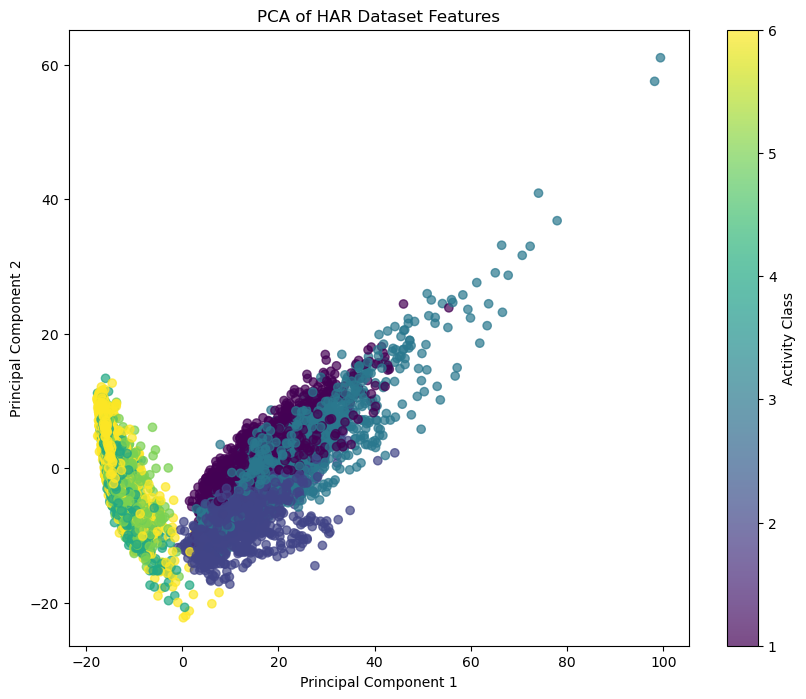

In [30]:
# Q3.3 PCA from features provided in dataset.
train_features_path = './UCI HAR Dataset/train/X_train.txt'
train_labels_path = './UCI HAR Dataset/train/y_train.txt'
test_features_path = './UCI HAR Dataset/test/X_test.txt'
test_labels_path = './UCI HAR Dataset/test/y_test.txt'

X_train = pd.read_csv(train_features_path, sep='\\s+', header=None)
y_train = pd.read_csv(train_labels_path, header=None)
X_test = pd.read_csv(test_features_path, sep='\\s+', header=None)
y_test = pd.read_csv(test_labels_path, header=None)

# Combining the train and test data
X = pd.concat([X_train, X_test], axis=0).values
y = pd.concat([y_train, y_test], axis=0).values.ravel()  # Convert to 1D array

print(f"Original shape of X: {X.shape}")  # (10299, 561)
X = X.reshape(X.shape[0], -1)
print(f"After re-shaping shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")  # (10299,)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

print(f"Shape of X after PCA: {X_pca.shape}")  # (10299, 2)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('PCA of HAR Dataset Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Activity Class')
plt.show()

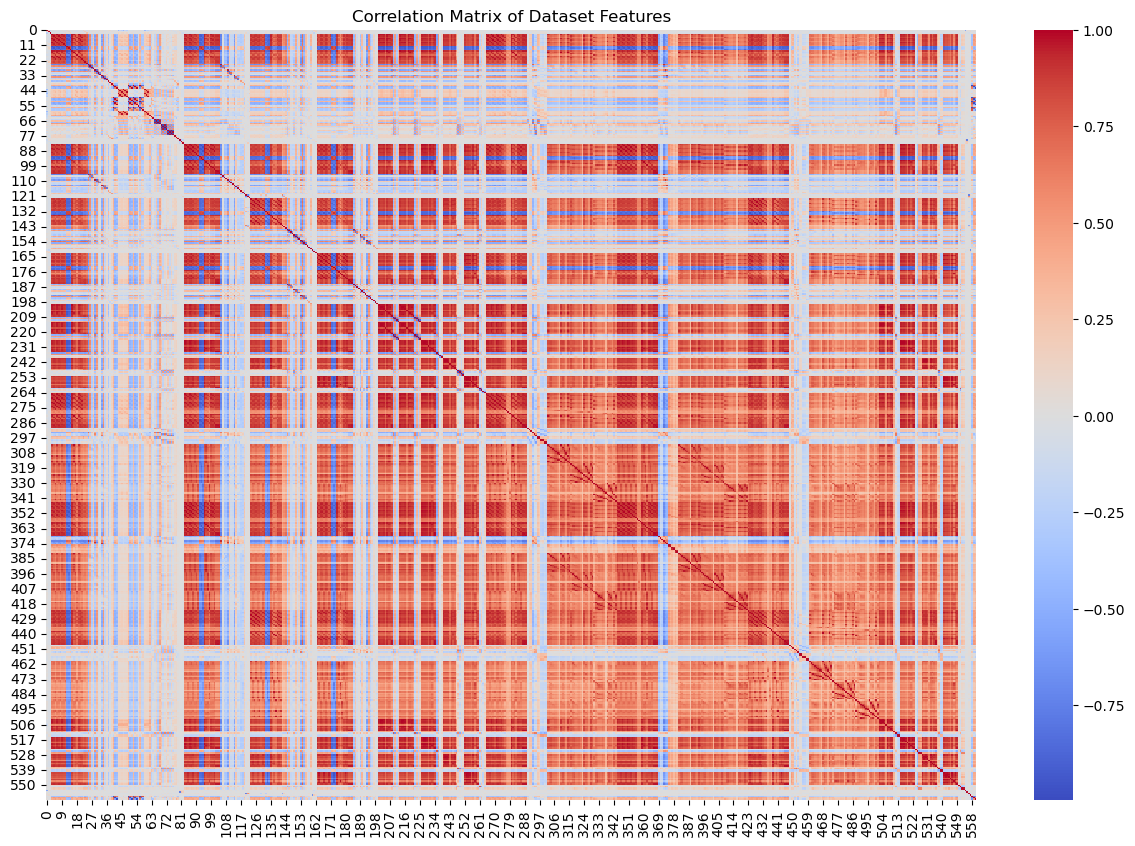

Highly correlated features (Dataset): {4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 59, 60, 61, 66, 67, 68, 70, 71, 72, 74, 75, 76, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 113, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 146, 154, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 189, 193, 200, 201, 202, 203, 205, 206, 207, 208, 210, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 239, 240, 241, 242, 244, 245, 246, 249, 252, 253, 254, 255, 257, 258, 259, 260, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 297, 299, 301, 302, 303, 310, 311, 312, 313, 314, 315, 316, 317, 318, 324, 325, 326, 327, 328, 329, 330, 332, 338, 339, 340, 341, 342, 34

In [18]:
# Q4 Correlation matrix calc.
f = pd.concat([X_train, X_test], axis=0)
correlation_matrix_dataset = f.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_dataset, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix of Dataset Features')
plt.show()

# Q4 Identifying highly correlated features in corr. matrix.
def get_highly_correlated_features(correlation_matrix, threshold=0.9):
    correlated_features = set()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)
    return correlated_features

# Get highly correlated features
highly_correlated_features_dataset = get_highly_correlated_features(correlation_matrix_dataset)


print("Highly correlated features (Dataset):", highly_correlated_features_dataset)


Q3.4. Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

Sol: 
1. PCA on Total Acceleration - The scatter plot doesn't provide any clear segregation boundaries between any type of activities, hence it provides less information gain.

2. PCA on TSFEL - Scatter plot due to TSFEL is better than Total acceleration. In TSFEL the classification within static activities are more distinctly visible as compared to dynamic activities. Also static and dynamic can be segregated clearly as well.

3. PCA on dataset features - It provides clear segregation boundaries between all the activities, hence provides best information gain. Due to large number of dataset features the confidence in the predicted boundaries is quite high.

   Hence, in conclusion the PCA on dataset features is the best way for data visualisation.


Q4. Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features?

Sol: In the features provided by TSFEL the correlation and confidence is less due to less number of feature samples on the other hand when compared to Dataset features, the correlation and confidence is quite high. This could be attributed to the large number of feature samples provided by the dataset. There are more number of redundant features in TSFEL as compared to Dataset features, which is evident from the correlation matrix of TSFEL. 